# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=2a3989a4e1186f7f97f3cb3582e779bb756a16e2425a6973886159a884e1c070
  Stored in directory: c:\users\ethan\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [21]:
cities

city_name = "San Francisco"
#city_name = city_name.replace(" ","%20")
api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
weather = requests.get(api_url)
w = weather.json()
w#["coord"]


{'coord': {'lon': -122.42, 'lat': 37.77},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 290.49,
  'feels_like': 283.12,
  'temp_min': 287.59,
  'temp_max': 293.15,
  'pressure': 1016,
  'humidity': 31},
 'visibility': 10000,
 'wind': {'speed': 7.7, 'deg': 290},
 'clouds': {'all': 1},
 'dt': 1604020928,
 'sys': {'type': 1,
  'id': 5817,
  'country': 'US',
  'sunrise': 1603981947,
  'sunset': 1604020444},
 'timezone': -25200,
 'id': 5391959,
 'name': 'San Francisco',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
i=0
weather_cities = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

for city in cities:
    try:
        api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
        weather = requests.get(api_url)
        w = weather.json()
        weather_cities.append(w["name"])
        lat.append(w["coord"]["lat"])
        long.append(w["coord"]["lon"])
        max_temp.append(w["main"]["temp_max"])
        humidity.append(w["main"]["humidity"])
        cloudiness.append(w["clouds"]["all"])
        wind_spd.append(w["wind"]["speed"])
        country.append(w["sys"]["country"])
        date.append(w["dt"])
        print(f"{city} is {i}th to be processed")
        i=i+1
    except KeyError:
        print(f"city of {city} not found")
        i=i+1
        pass
print("---")
print("Done.")
print("---")

timra is 0th to be processed
jiexiu is 1th to be processed
esperance is 2th to be processed
bluff is 3th to be processed
vaijapur is 4th to be processed
city of zachagansk not found
makat is 6th to be processed
punta arenas is 7th to be processed
saint-philippe is 8th to be processed
sapouy is 9th to be processed
necochea is 10th to be processed
cabo san lucas is 11th to be processed
felipe carrillo puerto is 12th to be processed
mataura is 13th to be processed
neryungri is 14th to be processed
hobart is 15th to be processed
patacamaya is 16th to be processed
hermanus is 17th to be processed
verkhoyansk is 18th to be processed
petropavlovsk-kamchatskiy is 19th to be processed
acajutla is 20th to be processed
butaritari is 21th to be processed
somerset east is 22th to be processed
georgetown is 23th to be processed
cape town is 24th to be processed
san carlos de bariloche is 25th to be processed
albany is 26th to be processed
coos bay is 27th to be processed
busselton is 28th to be proc

syamzha is 245th to be processed
urumqi is 246th to be processed
aktau is 247th to be processed
kirakira is 248th to be processed
mount gambier is 249th to be processed
city of bolungarvik not found
sturgeon falls is 251th to be processed
maniitsoq is 252th to be processed
gat is 253th to be processed
city of barawe not found
dwarka is 255th to be processed
tromso is 256th to be processed
klaksvik is 257th to be processed
biak is 258th to be processed
city of halalo not found
rovaniemi is 260th to be processed
constitucion is 261th to be processed
city of jubayl not found
saint-georges is 263th to be processed
elko is 264th to be processed
tanete is 265th to be processed
podolinec is 266th to be processed
sawtell is 267th to be processed
alta floresta is 268th to be processed
dikson is 269th to be processed
luganville is 270th to be processed
comodoro rivadavia is 271th to be processed
city of meyungs not found
nizhniy odes is 273th to be processed
rauma is 274th to be processed
payson

los llanos de aridane is 492th to be processed
alofi is 493th to be processed
suhbaatar is 494th to be processed
standerton is 495th to be processed
chimbote is 496th to be processed
lasa is 497th to be processed
rudbar is 498th to be processed
finnsnes is 499th to be processed
birnin kebbi is 500th to be processed
antofagasta is 501th to be processed
kurilsk is 502th to be processed
cumberland is 503th to be processed
nova olinda do norte is 504th to be processed
vestmanna is 505th to be processed
fairview is 506th to be processed
tahoua is 507th to be processed
gizycko is 508th to be processed
pervomayskoye is 509th to be processed
luan is 510th to be processed
batticaloa is 511th to be processed
dawlatabad is 512th to be processed
sarkand is 513th to be processed
saint-gaudens is 514th to be processed
muros is 515th to be processed
kavaratti is 516th to be processed
heyang is 517th to be processed
boa vista is 518th to be processed
chumikan is 519th to be processed
san carlos is 520

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
df = pd.DataFrame({
    "city":weather_cities,
    "lat":lat,
    "long":long,
    "max_temp":max_temp,
    "humidity":humidity,
    "cloudiness":cloudiness,
    "wind_spd":wind_spd,
    "country":country,
    "date":date
})
df.count()

city          552
lat           552
long          552
max_temp      552
humidity      552
cloudiness    552
wind_spd      552
country       552
date          552
dtype: int64

In [45]:
df.to_csv("weatherdata", index=True,header=True)
df.head()


,city,lat,long,max_temp,humidity,cloudiness,wind_spd,country,date
0,Timrå,62.49,17.33,276.48,93,0,3.10,SE,1604034070
1,Jiexiu,37.02,111.91,288.31,42,0,1.38,CN,1604034070
2,Esperance,-33.87,121.90,299.15,22,87,5.70,AU,1604034070
3,Bluff,-46.60,168.33,288.71,92,100,1.79,NZ,1604034070
4,Vaijāpur,19.92,74.73,299.73,40,0,1.47,IN,1604034070


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
df.describe()

,lat,long,max_temp,humidity,cloudiness,wind_spd,date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,18.902337,19.974239,287.626504,73.019928,51.327899,3.396033,1.604034e+09
std,33.949574,89.904155,12.557563,22.023613,40.302343,2.446310,8.015701e+01
min,-54.800000,-175.200000,251.550000,6.000000,0.000000,0.060000,1.604034e+09
25%,-9.777500,-57.612500,279.770000,59.000000,4.000000,1.500000,1.604034e+09
50%,20.710000,23.545000,289.325000,79.000000,59.500000,2.715000,1.604034e+09
75%,47.670000,98.172500,298.150000,91.000000,90.000000,4.662500,1.604034e+09
max,78.220000,179.320000,311.150000,100.000000,100.000000,14.900000,1.604035e+09


In [47]:
#  Get the indices of cities that have humidity over 100%.
df.loc[df["humidity"] > 100, :]

,city,lat,long,max_temp,humidity,cloudiness,wind_spd,country,date


In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df.head()

,city,lat,long,max_temp,humidity,cloudiness,wind_spd,country,date
0,Timrå,62.49,17.33,276.48,93,0,3.10,SE,1604034070
1,Jiexiu,37.02,111.91,288.31,42,0,1.38,CN,1604034070
2,Esperance,-33.87,121.90,299.15,22,87,5.70,AU,1604034070
3,Bluff,-46.60,168.33,288.71,92,100,1.79,NZ,1604034070
4,Vaijāpur,19.92,74.73,299.73,40,0,1.47,IN,1604034070


In [101]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv("cities_data.csv", index=False,header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

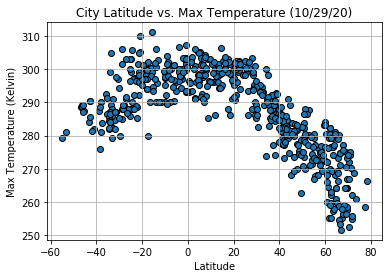

In [61]:
plt.scatter(df["lat"], 
            df["max_temp"],
            edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Max Temperature (10/29/20)")
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_max_temp.png")
plt.show()

This curved trend follows from how the earth is both curved and tilted along its axis.  The slight tilt in axis correlates to how the top of what would be the best curve fit isn't perfectly centered on the equator.

## Latitude vs. Humidity Plot

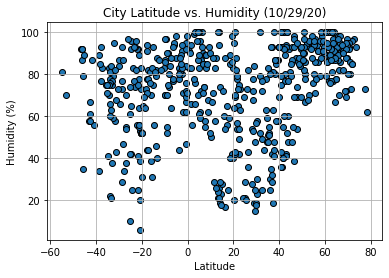

In [63]:
plt.scatter(df["lat"], 
            df["humidity"],
            edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Humidity (10/29/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

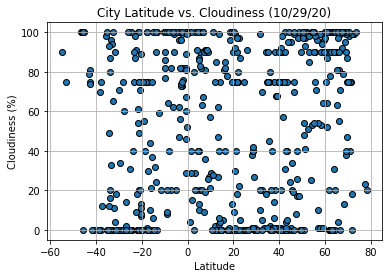

In [65]:
plt.scatter(df["lat"], 
            df["cloudiness"],
            edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Cloudiness (10/29/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_cloudiness.png")
plt.show()

No noticeable trends here, just that there's more cities that see either 100% or 0% cloudiness than in between.

## Latitude vs. Wind Speed Plot

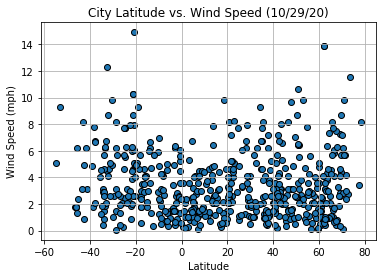

In [66]:
plt.scatter(df["lat"], 
            df["wind_spd"],
            edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Wind Speed (10/29/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("lat_vs_wind_spd.png")
plt.show()

Wind speeds appear to be more varied along the extremes of the north and south poles.

## Linear Regression

In [85]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(x_axis,y_axis,x_title,y_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,(x_axis*slope + intercept),"r-")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print(line_eq)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [86]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df["lat"]>=0,:]
df_south = df.loc[df["lat"]<=0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.55x + 305.85
The r-squared is: 0.7674630318215003


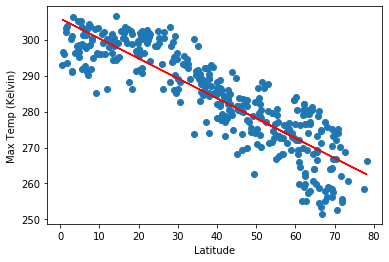

In [91]:
linear_reg_plot(df_north["lat"],df_north["max_temp"],"Latitude","Max Temp (Kelvin)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.34x + 301.4
The r-squared is: 0.38933769768582416


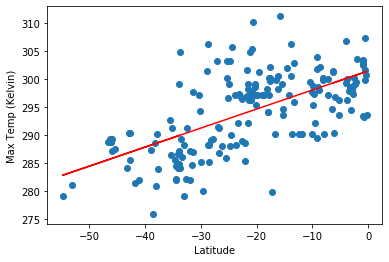

In [92]:
linear_reg_plot(df_south["lat"],df_south["max_temp"],"Latitude","Max Temp (Kelvin)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x + 59.02
The r-squared is: 0.1325134322175463


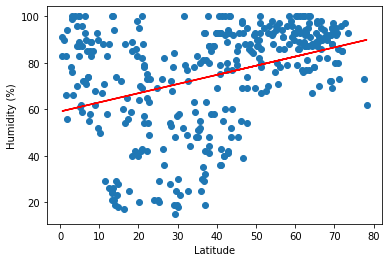

In [93]:
linear_reg_plot(df_north["lat"],df_north["humidity"],"Latitude","Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.24x + 75.37
The r-squared is: 0.02384478030144728


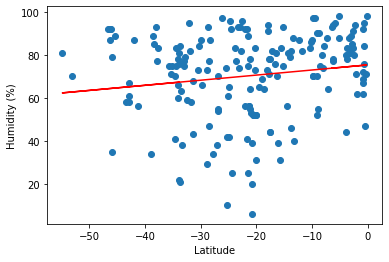

In [94]:
linear_reg_plot(df_south["lat"],df_south["humidity"],"Latitude","Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.41x + 35.38
The r-squared is: 0.04619744987265113


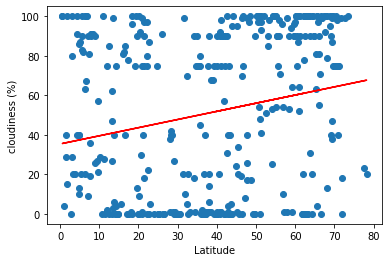

In [95]:
linear_reg_plot(df_north["lat"],df_north["cloudiness"],"Latitude","cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.66x + 65.07
The r-squared is: 0.04646012402093679


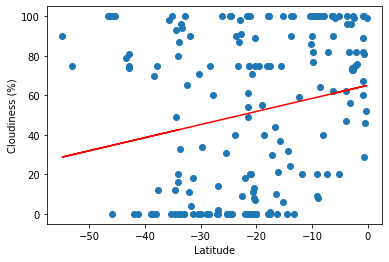

In [96]:
linear_reg_plot(df_south["lat"],df_south["cloudiness"],"Latitude","Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 2.48
The r-squared is: 0.025936488608194228


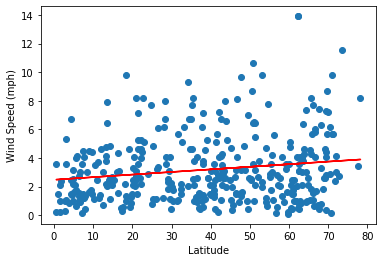

In [97]:
linear_reg_plot(df_north["lat"],df_north["wind_spd"],"Latitude","Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 3.09
The r-squared is: 0.0320693865220632


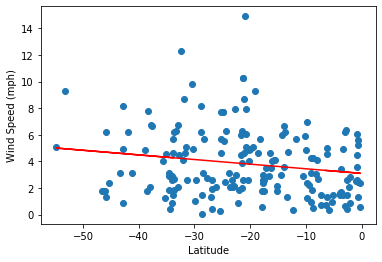

In [98]:
linear_reg_plot(df_south["lat"],df_south["wind_spd"],"Latitude","Wind Speed (mph)")